<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EC%8B%A4%EC%8A%B5/ADP%EC%8B%A4%EC%8A%B5_6%EC%A3%BC%EC%B0%A8_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN 

1. 임의의 점 A에 대해 모든 훈련 데이터들과의 거리를 계산한다. 일반적으로 유클리드거리를 사용하지만, Manhattan distance나 Minkowski distance를 사용하기도 한다.

 (Minkowski distance의 경우 많이 떨어진 거리를 부각할 때 사용된다.)

2. 측정한 거리가 작은 순서대로 K개의 점을 찾는다. 이 때 K는 KNN Classifier에서 hyperparameter의 역할을 한다.

3. K개의 점들이 속한 클래스를 찾는다.

4. K개의 점들이 속한 클래스가 가장 많은 것을 찾는다. 예를 들어 클래스 집합이 {1,1,1,1,2,2,2,4}와 같다면, 클래스 1이 가장 많다고 평가한다.

5. 시험 데이터와 비교하여 score를 매기고, 분류가 잘 되었는지 확인한다.

6. K값을 바꾸어 가며 가장 정확하게 분류하는 K를 찾는다. 이 때 교차 검정(Cross Validation)방법을 활용할 수 있는데 훈련 데이터와 시험 데이터를 샘플링을 통해 계속 바꾸어 가며 scoring을 하는 방식이다.

In [2]:
# import library
from sklearn import neighbors, datasets     # KNN운 neighbors에, 실습할 데이터 iris는 datasets에
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # KNN의 분류 영역 표시를 위한 컬러맵

# load datasets
iris = datasets.load_iris()

X = iris.data[:,:2]                          # 간편한 실습을 위해 변수 두 개만 사용
y = iris.target

In [3]:
clf = neighbors.KNeighborsClassifier(5)      # k=5로 지정해준 것이다.
clf.fit(X,y)

KNeighborsClassifier()

In [4]:
y_pred = clf.predict(X)       

In [8]:
# confusion_matrix를 활용한 모델예측 정확도 측정
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
print(confusion_matrix(y,y_pred))

accuracy = metrics.accuracy_score(y, y_pred)
print("정확도:", accuracy)


[[49  1  0]
 [ 0 37 13]
 [ 0 10 40]]
정확도: 0.84


In [9]:
# cross-validation library
from sklearn.model_selection import cross_val_score

In [11]:
k_range = range(1,100)              # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_scores = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = neighbors.KNeighborsClassifier(k)
	scores = cross_val_score(knn,X,y,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_scores.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

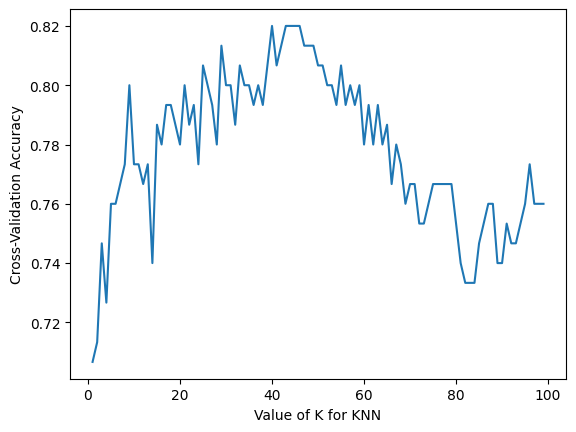

In [12]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

 위의 그래프는 10-Fold-Cross-Validation의 Score(Mean of Accuracy, 정확도 평균)를 시각화한 것이다. 정확도이기에 가장 높을수록 좋은 k이며 대략 KNN의 k=45가 현재 데이터에 가장 이상적인 k라고 판단할 수 있다.